## Medical Cost Personal Datasets


---------------
##  Dataset
---------------

This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

-----------------
## Objective
-----------------

Here, we are analyzing different area in the US to predict insurance costs

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

#### Step_1:  Prepare Problem


Load libraries

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline 
#Data Transform
from sklearn.preprocessing import MinMaxScaler


Load dataset

In [139]:
df = pd.read_csv("insurance.csv")
df=pd.DataFrame(df)

#### Step_2: Summarize Data

Descriptive statistics

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df.shape

(1338, 7)

In [142]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [143]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [144]:
df.isnull().values.any()

False

In [145]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [146]:
 df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [147]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [148]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [149]:
c=df[['age','bmi','charges']].corr()
c

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


Data visualizations

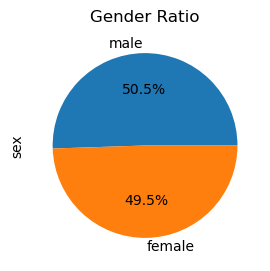

In [150]:
plt.figure(figsize=(3, 3))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

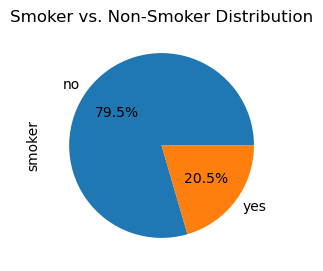

In [151]:
plt.figure(figsize=(3,3))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

<Axes: xlabel='region', ylabel='count'>

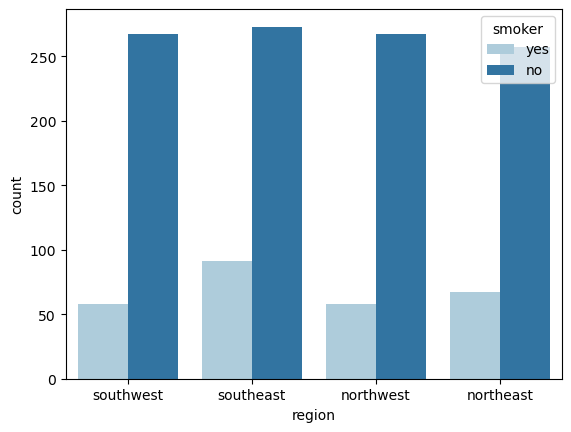

In [152]:
# Smokers based on region
sns.countplot(x="region", hue="smoker", data=df, palette="Paired")

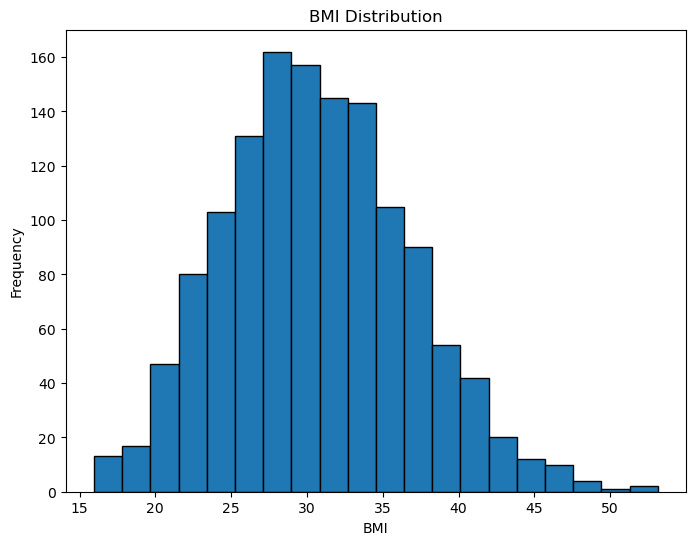

In [153]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

<Axes: >

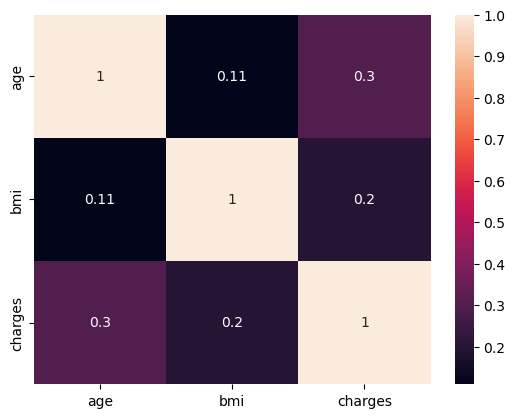

In [154]:
sns.heatmap(c,annot=True)

<Figure size 500x400 with 0 Axes>

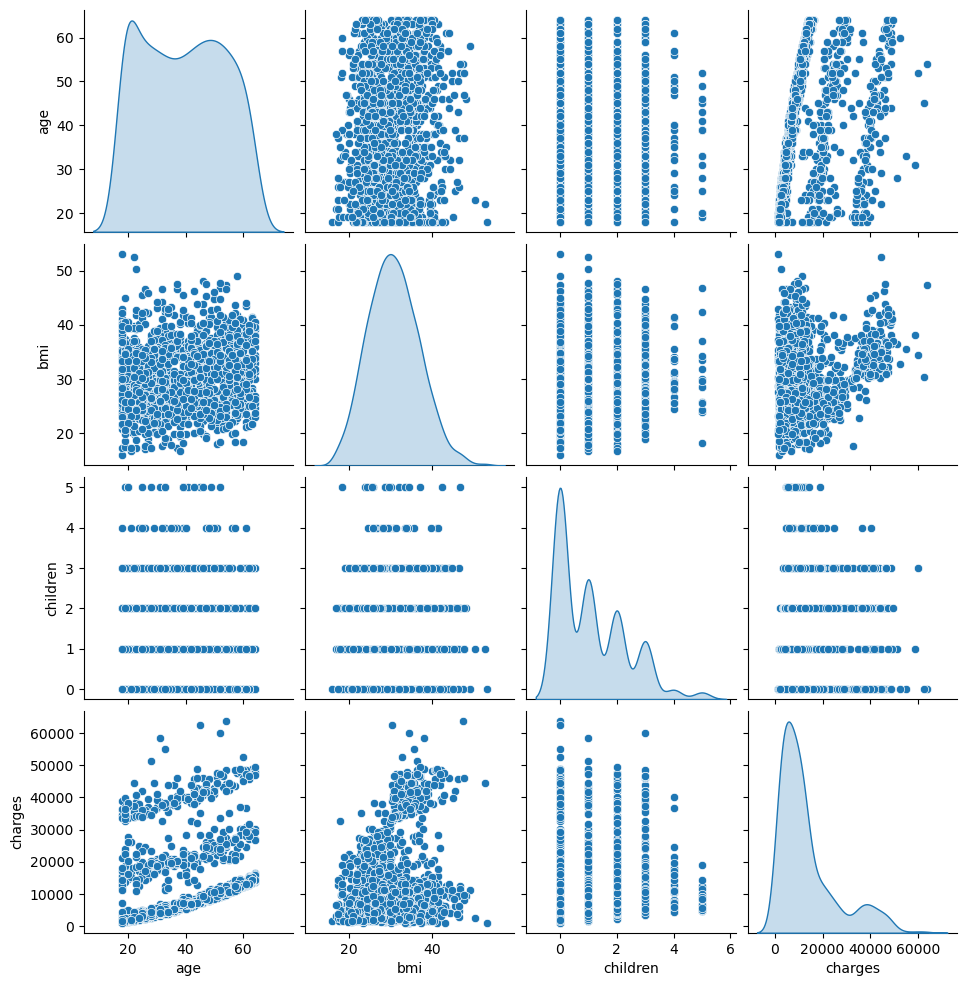

In [155]:
fig = plt.figure(figsize = (5, 4))
sns.pairplot(df,diag_kind='kde')

age charges


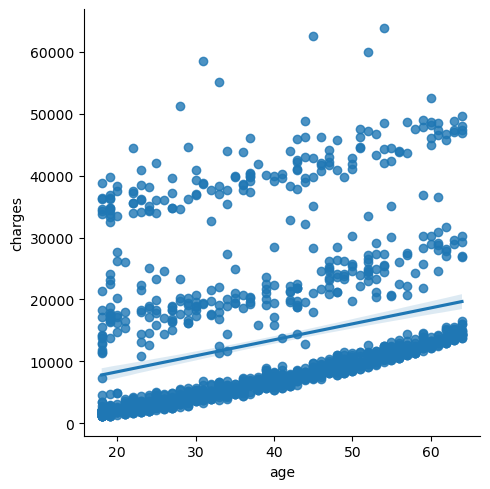

In [156]:
x='age'
y='charges'
print(x,y)
sns.lmplot(x=x,y=y,data=df)

Text(0, 0.5, 'bmi')

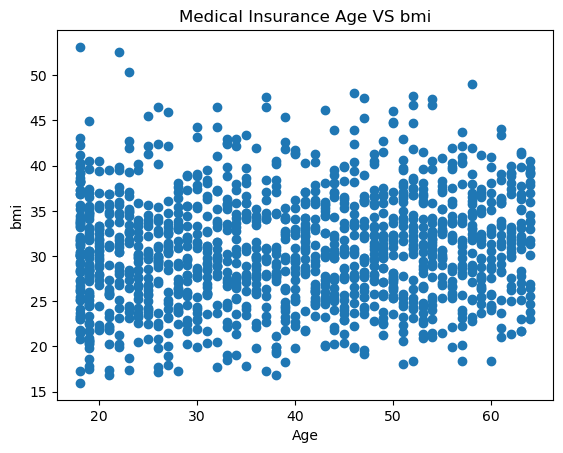

In [157]:
plt.scatter(df.age, df.bmi)
plt.title('Medical Insurance Age VS bmi')
plt.xlabel('Age')
plt.ylabel('bmi')

In [158]:
#We plot a smokers vs non smokers on a scatter plot. 

plt.scatter(df_smokers.age, df_smokers.charges, label = 'smokers')
plt.scatter(df_nonsmokers.age, df_nonsmokers.charges, label = 'non_smokers')
plt.title('Medical Insurance Age VS Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()


NameError: name 'df_smokers' is not defined

### Ml

In [193]:
##Converting category labels into numerical using LabelEncoder
encoder = LabelEncoder()
df1['sex'] = encoder.fit_transform(df['sex'])
df1['smoker'] = encoder.fit_transform(df['smoker'])
df1['region'] = encoder.fit_transform(df['region'])
df1

,age,sex,bmi,children,smoker,charges,region
0,19,0,27.900,0,1,16884.92400,3
1,18,1,33.770,1,0,1725.55230,2
2,28,1,33.000,3,0,4449.46200,2
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1
1334,18,0,31.920,0,0,2205.98080,0
1335,18,0,36.850,0,0,1629.83350,2
1336,21,0,25.800,0,0,2007.94500,3


In [194]:
X = df1.drop('charges', axis = 1)
y = df1['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=90)

In [195]:
s_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LinearRegression()) #estimator
])

In [196]:
s_pipline.fit(X_train, y_train)


Pipeline(steps=[('scaler', MinMaxScaler()), ('model', LinearRegression())])

In [197]:
s_pipline.score(X_train, y_train)

0.7456532737612509

In [198]:
corr = df1.corr()
corr['charges'].sort_values(ascending=False)


charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [205]:
#we remove our PersonID column, as it doesn't add much value to the dataset
df1.drop(df["region"])

KeyError: "['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest', 'northeast', 'southeast', 'southwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northeast', 'southwest', 'southwest', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'southeast', 'northeast', 'northwest', 'northwest', 'southwest', 'southwest', 'northeast', 'southwest', 'northwest', 'southwest', 'northwest', 'northwest', 'southwest', 'northeast', 'southwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'northeast', 'northwest', 'southeast', 'southeast', 'northeast', 'northwest', 'southwest', 'southeast', 'northwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northwest', 'northeast', 'southeast', 'northwest', 'northwest', 'northwest', 'southwest', 'southwest', 'northwest', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'southeast', 'southwest', 'northwest', 'southeast', 'southeast', 'northeast', 'northwest', 'northeast', 'northeast', 'southeast', 'northwest', 'southwest', 'northwest', 'northwest', 'southwest', 'northwest', 'northwest', 'southeast', 'northwest', 'northeast', 'northwest', 'southwest', 'southeast', 'southwest', 'southeast', 'northeast', 'southwest', 'southwest', 'northeast', 'northeast', 'southeast', 'southwest', 'northwest', 'southwest', 'northwest', 'southeast', 'southeast', 'northwest', 'southwest', 'southwest', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'southwest', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'southwest', 'southwest', 'northwest', 'southwest', 'northeast', 'northeast', 'southwest', 'northwest', 'northeast', 'southeast', 'southwest', 'northwest', 'southeast', 'southwest', 'northeast', 'northeast', 'southeast', 'northwest', 'northwest', 'southeast', 'northwest', 'southeast', 'northwest', 'southwest', 'northwest', 'southeast', 'northeast', 'northeast', 'northeast', 'northwest', 'southeast', 'northeast', 'southeast', 'southeast', 'northwest', 'southeast', 'southwest', 'southwest', 'northwest', 'northeast', 'southwest', 'northwest', 'northwest', 'northeast', 'southeast', 'southwest', 'northeast', 'southwest', 'northwest', 'southwest', 'northwest', 'southwest', 'southwest', 'northeast', 'northwest', 'southeast', 'northeast', 'northwest', 'southeast', 'northeast', 'southeast', 'southwest', 'southwest', 'northwest', 'southeast', 'southwest', 'southeast', 'northwest', 'southeast', 'northwest', 'southwest', 'southeast', 'northwest', 'northeast', 'northwest', 'southeast', 'northwest', 'southeast', 'southwest', 'northeast', 'southeast', 'northeast', 'southwest', 'northeast', 'southwest', 'northwest', 'northwest', 'southeast', 'southwest', 'southwest', 'northwest', 'southeast', 'southeast', 'southeast', 'southwest', 'northeast', 'southwest', 'southwest', 'southeast', 'southeast', 'southeast', 'southeast', 'northeast', 'northeast', 'northwest', 'southeast', 'southwest', 'southwest', 'northwest', 'southeast', 'southeast', 'southeast', 'northwest', 'southeast', 'northeast', 'northeast', 'southwest', 'southwest', 'northeast', 'northwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northeast', 'southwest', 'southeast', 'southwest', 'northeast', 'northeast', 'northwest', 'southeast', 'northwest', 'northwest', 'southwest', 'southeast', 'northeast', 'northwest', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'northeast', 'southeast', 'southwest', 'northwest', 'northeast', 'northwest', 'northeast', 'northwest', 'southwest', 'southeast', 'southeast', 'northeast', 'northeast', 'northeast', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'northeast', 'southeast', 'southwest', 'northeast', 'southeast', 'southeast', 'southwest', 'northeast', 'southwest', 'southeast', 'northwest', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'southwest', 'northwest', 'southwest', 'southeast', 'northeast', 'northwest', 'southwest', 'southwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'southwest', 'northeast', 'southwest', 'northeast', 'southeast', 'northwest', 'southwest', 'southwest', 'northeast', 'northwest', 'northwest', 'northeast', 'northeast', 'southwest', 'southeast', 'northwest', 'northeast', 'southeast', 'southwest', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'southeast', 'northeast', 'southeast', 'northwest', 'northwest', 'southwest', 'southwest', 'northeast', 'southeast', 'southwest', 'southeast', 'northwest', 'southeast', 'southeast', 'northeast', 'southwest', 'southwest', 'southwest', 'southeast', 'northeast', 'northeast', 'northwest', 'northwest', 'northeast', 'northwest', 'northeast', 'northeast', 'southwest', 'southeast', 'northwest', 'northeast', 'southeast', 'northwest', 'southeast', 'northeast', 'northeast', 'southeast', 'southeast', 'northeast', 'southwest', 'southeast', 'northwest', 'northwest', 'northwest', 'northeast', 'northwest', 'northeast', 'northeast', 'northeast', 'northwest', 'southwest', 'southeast', 'southwest', 'southeast', 'southwest', 'southeast', 'northwest', 'northwest', 'southwest', 'northeast', 'southeast', 'southwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northeast', 'southwest', 'northwest', 'southeast', 'southeast', 'southwest', 'southeast', 'northwest', 'southeast', 'southeast', 'northeast', 'northeast', 'southwest', 'southeast', 'northeast', 'northeast', 'northeast', 'northwest', 'southwest', 'northwest', 'southwest', 'southwest', 'northwest', 'southeast', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'southwest', 'southeast', 'southeast', 'northwest', 'southwest', 'northeast', 'northwest', 'southwest', 'southwest', 'southwest', 'northwest', 'southwest', 'northwest', 'southeast', 'southwest', 'southeast', 'northwest', 'southwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northeast', 'northwest', 'southeast', 'southwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northeast', 'southwest', 'northeast', 'southwest', 'northwest', 'northeast', 'northwest', 'southeast', 'southeast', 'northwest', 'southeast', 'southeast', 'southwest', 'southwest', 'northeast', 'northwest', 'southwest', 'southeast', 'northwest', 'southwest', 'southeast', 'northeast', 'southwest', 'southwest', 'northeast', 'southwest', 'southwest', 'southeast', 'southwest', 'southwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'northwest', 'northwest', 'northeast', 'southwest', 'northeast', 'southeast', 'northeast', 'southwest', 'southwest', 'southwest', 'southeast', 'northwest', 'southwest', 'northeast', 'northeast', 'southeast', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'southwest', 'northeast', 'northeast', 'southeast', 'northeast', 'southeast', 'southeast', 'southeast', 'northeast', 'southwest', 'southwest', 'southeast', 'southeast', 'southwest', 'southeast', 'southeast', 'southeast', 'northwest', 'northwest', 'northeast', 'southwest', 'northeast', 'southeast', 'southwest', 'southeast', 'southwest', 'northwest', 'northeast', 'southwest', 'northeast', 'southeast', 'northwest', 'northwest', 'northwest', 'northeast', 'southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'northwest', 'southwest', 'northwest', 'southwest', 'southeast', 'southeast', 'northeast', 'northeast', 'northwest', 'southeast', 'northeast', 'southwest', 'northeast', 'northeast', 'northwest', 'southeast', 'southeast', 'southwest', 'southeast', 'northeast', 'northwest', 'northeast', 'southeast', 'southwest', 'northwest', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southwest', 'northwest', 'southeast', 'northwest', 'southwest', 'southeast', 'northwest', 'southeast', 'northeast', 'northwest', 'northeast', 'southwest', 'southeast', 'southwest', 'northeast', 'northeast', 'southeast', 'southeast', 'northeast', 'southwest', 'southeast', 'southwest', 'southwest', 'southwest', 'southwest', 'northeast', 'northwest', 'northwest', 'northeast', 'southeast', 'southwest', 'northwest', 'southwest', 'southwest', 'southeast', 'northeast', 'southwest', 'northeast', 'northwest', 'northeast', 'northeast', 'southeast', 'southwest', 'northwest', 'northeast', 'northwest', 'southeast', 'northeast', 'northwest', 'northeast', 'northeast', 'northeast', 'southeast', 'southeast', 'southeast', 'southeast', 'southeast', 'southeast', 'southwest', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'northeast', 'southeast', 'southeast', 'southeast', 'southwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'southeast', 'northwest', 'southwest', 'northwest', 'southwest', 'southwest', 'southwest', 'northwest', 'southwest', 'northeast', 'northeast', 'southeast', 'southwest', 'southeast', 'northeast', 'southwest', 'northwest', 'northwest', 'southwest', 'northwest', 'northeast', 'southeast', 'northwest', 'southeast', 'southeast', 'northeast', 'southeast', 'northwest', 'northwest', 'southwest', 'southeast', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'northwest', 'northeast', 'southwest', 'southwest', 'northwest', 'northwest', 'northwest', 'northwest', 'northeast', 'southwest', 'southwest', 'southwest', 'northeast', 'southeast', 'northwest', 'northeast', 'northeast', 'southeast', 'southeast', 'southwest', 'southwest', 'northeast', 'southwest', 'northwest', 'southeast', 'southwest', 'northeast', 'southwest', 'northeast', 'southeast', 'northeast', 'southeast', 'northwest', 'northwest', 'southwest', 'northwest', 'southwest', 'northwest', 'southeast', 'northwest', 'northwest', 'southeast', 'northeast', 'northeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southwest', 'southwest', 'northeast', 'northeast', 'northwest', 'southwest', 'southwest', 'southwest', 'northwest', 'southwest', 'southwest', 'northeast', 'northwest', 'northwest', 'southeast', 'northwest', 'northeast', 'southeast', 'northwest', 'southwest', 'southeast', 'southeast', 'southwest', 'southeast', 'southwest', 'northeast', 'northwest', 'northeast', 'southeast', 'southeast', 'southwest', 'northeast', 'southeast', 'northwest', 'northwest', 'southeast', 'northeast', 'southwest', 'northeast', 'southeast', 'southeast', 'southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'northwest', 'southeast', 'northeast', 'southwest', 'northwest', 'southeast', 'northeast', 'southeast', 'southeast', 'northwest', 'southwest', 'northeast', 'northwest', 'southwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'southeast', 'northeast', 'northeast', 'northwest', 'southwest', 'northwest', 'northwest', 'northwest', 'northwest', 'southeast', 'southwest', 'northeast', 'northeast', 'northwest', 'southwest', 'northeast', 'southeast', 'southeast', 'northeast', 'southeast', 'southwest', 'southeast', 'southwest', 'northwest', 'northeast', 'northwest', 'northeast', 'northeast', 'northeast', 'southwest', 'southeast', 'northwest', 'southeast', 'southwest', 'southwest', 'southwest', 'northwest', 'northeast', 'southwest', 'southwest', 'southeast', 'southwest', 'northeast', 'southwest', 'southwest', 'southeast', 'southeast', 'southwest', 'northeast', 'northwest', 'southwest', 'southeast', 'southwest', 'southwest', 'southwest', 'northwest', 'northeast', 'northeast', 'northwest', 'southeast', 'northeast', 'northwest', 'southwest', 'northwest', 'northwest', 'southeast', 'northeast', 'southeast', 'northeast', 'southwest', 'northeast', 'northwest', 'southeast', 'northwest', 'northeast', 'southeast', 'northeast', 'southeast', 'southwest', 'northeast', 'northeast', 'southeast', 'southwest', 'southwest', 'northwest', 'northeast', 'northwest', 'southwest', 'northwest', 'southeast', 'northwest', 'northeast', 'southwest', 'southeast', 'southwest', 'southwest', 'southwest', 'northwest', 'southwest', 'northeast', 'southwest', 'southwest', 'southeast', 'southeast', 'southeast', 'southwest', 'southwest', 'southwest', 'southeast', 'southwest', 'northeast', 'northwest', 'southeast', 'southeast', 'southeast', 'southeast', 'northeast', 'northwest', 'southeast', 'southwest', 'southwest', 'northeast', 'northwest', 'southwest', 'northeast', 'southeast', 'northwest', 'southwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest', 'northwest', 'southwest', 'southeast', 'northeast', 'northwest', 'southwest', 'northwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northeast', 'northwest', 'southwest', 'southeast', 'northeast', 'southeast', 'southeast', 'northeast', 'southeast', 'northeast', 'northeast', 'southwest', 'northeast', 'northeast', 'southwest', 'northwest', 'northwest', 'northeast', 'northeast', 'southwest', 'northeast', 'southwest', 'southeast', 'northwest', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'northwest', 'southwest', 'southwest', 'southwest', 'northeast', 'northwest', 'northeast', 'northwest', 'northeast', 'northeast', 'southwest', 'southeast', 'southeast', 'northwest', 'southwest', 'northwest', 'northwest', 'southwest', 'northwest', 'northwest', 'southwest', 'southeast', 'southeast', 'southeast', 'southeast', 'southwest', 'northwest', 'northwest', 'southwest', 'northeast', 'northwest', 'southeast', 'northeast', 'northeast', 'northwest', 'southwest', 'southeast', 'northwest', 'northeast', 'northwest', 'northwest', 'northeast', 'northeast', 'southwest', 'northeast', 'northwest', 'northeast', 'southeast', 'northwest', 'southwest', 'northwest', 'northeast', 'northeast', 'southwest', 'northwest', 'northwest', 'southwest', 'southeast', 'southeast', 'northwest', 'southeast', 'southeast', 'southeast', 'northwest', 'southwest', 'southwest', 'southeast', 'northeast', 'northwest', 'southeast', 'southeast', 'northeast', 'northwest', 'northeast', 'northeast', 'southeast', 'southwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'northwest', 'southwest', 'northwest', 'southwest', 'northeast', 'northwest', 'southeast', 'southwest', 'southeast', 'northeast', 'southwest', 'northwest', 'southwest', 'northeast', 'northeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southwest', 'southeast', 'southeast', 'southwest', 'southeast', 'northwest', 'northwest', 'southwest', 'southeast', 'northeast', 'southeast', 'southeast', 'northwest', 'northeast', 'southeast', 'northeast', 'southeast', 'southeast', 'northwest', 'southwest', 'southeast', 'northwest', 'northeast', 'northeast', 'northwest', 'southwest', 'southeast', 'southwest', 'southwest', 'southeast', 'southwest', 'northeast', 'northwest', 'northwest', 'northwest', 'southwest', 'northwest', 'southeast', 'northwest', 'southeast', 'southwest', 'southeast', 'southeast', 'southwest', 'northwest', 'southwest', 'northwest', 'southwest', 'southwest', 'northeast', 'northwest', 'southeast', 'northwest', 'northwest', 'northeast', 'southeast', 'northwest', 'northeast', 'southwest', 'northwest', 'southeast', 'southeast', 'northeast', 'northwest', 'northeast', 'southeast', 'southwest', 'southwest', 'northwest', 'northeast', 'southwest', 'southeast', 'northwest', 'northwest', 'southwest', 'northwest', 'southwest', 'northeast', 'southeast', 'northeast', 'northwest', 'southwest', 'northeast', 'southeast', 'northeast', 'northwest', 'northwest', 'northeast', 'southwest', 'northwest', 'northeast', 'northeast', 'northwest', 'northwest', 'northwest', 'northwest', 'southeast', 'northwest', 'southwest', 'northwest', 'northwest', 'northwest', 'northeast', 'southeast', 'northwest', 'southwest', 'southwest', 'northeast', 'southwest', 'northwest', 'southeast', 'northeast', 'southwest', 'northwest', 'northeast', 'southeast', 'southeast', 'southwest', 'northwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northeast', 'southeast', 'northeast', 'southeast', 'southeast', 'northeast', 'northwest', 'southwest', 'northwest', 'southwest', 'southeast', 'northwest', 'northeast', 'northwest', 'northeast', 'southeast', 'southeast', 'southeast', 'northwest', 'southeast', 'southeast', 'southwest', 'southwest', 'southwest', 'southeast', 'northeast', 'northeast', 'southwest', 'southwest', 'southwest', 'southeast', 'southwest', 'northwest', 'northwest', 'northwest', 'northeast', 'northeast', 'southwest', 'southeast', 'southwest', 'northeast', 'southeast', 'southwest', 'northeast', 'southwest', 'southwest', 'northwest', 'northwest', 'southeast', 'southeast', 'southeast', 'southwest', 'northeast', 'northwest', 'northeast', 'northwest', 'southeast', 'northwest', 'northeast', 'southeast', 'southwest', 'northeast', 'northeast', 'southwest', 'southwest', 'southeast', 'northeast', 'southwest', 'southeast', 'northwest', 'northeast', 'southwest', 'northeast', 'southeast', 'northwest', 'northwest', 'southeast', 'northwest', 'southwest', 'southwest', 'northeast', 'southeast', 'northeast', 'northwest', 'southwest', 'southwest', 'northwest', 'northwest', 'southwest', 'southwest', 'northwest', 'northeast', 'southwest', 'southeast', 'northeast', 'northwest', 'northwest', 'northeast', 'southeast', 'southeast', 'northwest', 'northeast', 'northeast', 'southeast', 'northeast', 'southwest', 'southeast', 'southwest', 'southwest', 'northwest', 'northeast', 'southeast', 'southwest', 'northwest'] not found in axis"

In [200]:


X = df1.drop('charges', axis = 1)
y = df1['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=90)

s_pipline=Pipeline([
    ("scaler", MinMaxScaler()), #transformer
    ("model", LinearRegression()) #estimator
])

In [201]:
s_pipline.score(X_train, y_train)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [177]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train, y_train);

In [181]:

y_pred = tree_reg_model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
print("MAE" ,MAE_tree_reg)
print("MSE" ,MSE_tree_reg)
print("RMSE" ,RMSE_tree_reg)

MAE 3527.630096487563
MSE 51473289.70598432
RMSE 7174.488811475304


In [75]:
print(linear_reg_model.score(X_test, y_test))

0.732991586648684


In [167]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.2)
Ridge.fit(X_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_test, y_test))

-11391.607466882502
[  252.33276558   -33.6151789    334.07954781   458.36823947
 23673.89198913  -439.60235164]
0.7615231788422555


In [168]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_test, y_test))

-11396.14473721433
[  252.35546748   -34.47664586   334.01315849   458.18228848
 23704.16339504  -439.4863237 ]
0.7615484198351606
